In [1]:
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/users/markregalla/desktop/metis/Project3/data/LoanStats3d.csv', header=1)
#df = df.dropna()

/Users/markregalla/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
#df = df.drop(180103, axis=0)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.options.display.mpl_style = 'default'

In [3]:
df['emp_title'] = df['emp_title'].str.lower()
df['emp_title'] = df['emp_title'].str.strip()

In [4]:
len(df['emp_title'].unique())

49524

In [21]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [6]:
emp_title_list = df['emp_title']
emp_title_list = emp_title_list.dropna()
emp_title_list = emp_title_list.tolist()
len(emp_title_list)

170661

In [80]:
reduced_test_list = emp_title_list[:40]
reduced_test_list

['instructional designer',
 'customer service representative',
 'wire tech',
 'csr',
 'branch manager',
 'crm business analyst',
 'sales',
 'billing representative',
 'project manager',
 'substance abuse counselor',
 'customer service',
 'associate manager public relations',
 'tax manager',
 'wireless network support',
 'lead teacher',
 'deputy',
 'csm   teller',
 'correctional security officer iv',
 'custodial',
 'teacher',
 'insurance coordinator',
 'sr. sales associate',
 'associate director of nursing',
 'paraeducator',
 'clinical monitoring project lead',
 'accounting tech ii',
 'vice president',
 'teacher',
 'postmaster',
 'compliance consultant',
 'np',
 'web content',
 'personal banker',
 'payroll clerk',
 'anchem engineering technician',
 'field specialist',
 'manufacturing engineer',
 'acct aditors',
 'dental hygienist',
 'operations manager']

In [84]:
%%time
#innerlist = []
#untouched = emp_title_list

def reducedown(title_list, bigDict = {}):
    i = 1
    untouched = []
    matchedindeces = []
    while i < len(title_list):
        if fuzz.ratio(title_list[0], title_list[i]) >= 85:
            matchedindeces.append(i)
            #print title_list[i]
        else:
            untouched.append(title_list[i])
        i += 1
    
    bigDict[title_list[0]] = matchedindeces
    print 'Length of untouched: ' + str(len(untouched))
    if len(untouched) > 1:
        reducedown(untouched)
    return bigDict

#theDict = reducedown(emp_title_list)
thetestDict = reducedown(reduced_test_list)
print 'Done.'

Length of untouched: 39
Length of untouched: 38
Length of untouched: 37
Length of untouched: 36
Length of untouched: 35
Length of untouched: 34
Length of untouched: 33
Length of untouched: 32
Length of untouched: 31
Length of untouched: 30
Length of untouched: 29
Length of untouched: 28
Length of untouched: 27
Length of untouched: 26
Length of untouched: 25
Length of untouched: 24
Length of untouched: 23
Length of untouched: 22
Length of untouched: 21
Length of untouched: 19
Length of untouched: 18
Length of untouched: 17
Length of untouched: 16
Length of untouched: 15
Length of untouched: 14
Length of untouched: 13
Length of untouched: 12
Length of untouched: 11
Length of untouched: 10
Length of untouched: 9
Length of untouched: 8
Length of untouched: 7
Length of untouched: 6
Length of untouched: 5
Length of untouched: 4
Length of untouched: 3
Length of untouched: 2
Length of untouched: 1
Done.
CPU times: user 92.1 ms, sys: 12.6 ms, total: 105 ms
Wall time: 96.6 ms


In [85]:
thetestDict

{'accounting tech ii': [],
 'acct aditors': [],
 'anchem engineering technician': [],
 'associate director of nursing': [],
 'associate manager public relations': [],
 'billing representative': [],
 'branch manager': [],
 'clinical monitoring project lead': [],
 'compliance consultant': [],
 'correctional security officer iv': [],
 'crm business analyst': [],
 'csm   teller': [],
 'csr': [],
 'custodial': [],
 'customer service': [],
 'customer service representative': [],
 'dental hygienist': [],
 'deputy': [],
 'field specialist': [],
 'instructional designer': [],
 'insurance coordinator': [],
 'lead teacher': [],
 'manufacturing engineer': [],
 'np': [],
 'paraeducator': [],
 'payroll clerk': [],
 'personal banker': [],
 'postmaster': [],
 'project manager': [],
 'sales': [],
 'sr. sales associate': [],
 'substance abuse counselor': [],
 'tax manager': [],
 'teacher': [8],
 'vice president': [],
 'web content': [],
 'wire tech': [],
 'wireless network support': []}

In [8]:
len(df['emp_title'].unique()) / len(df)

0.27497445920135033

In [73]:
df_emp_title = df['emp_title']
df_emp_title = df_emp_title.dropna()    #dropping na to the entire dataframe was dropping most data
print len(df_emp_title[df_emp_title.str.contains('abuse')])
df_emp_title[df_emp_title.str.contains('abuse')]
#print len(df['emp_title'].str.contains('manager')) result = 180104 (not sure why)

14


9          substance abuse counselor
8416       substance abuse counselor
28535       child abuse investigator
39218     substance abuse caseworker
75810     substance abuse prevention
81723      substance abuse counselor
87654      substance abuse counselor
92824      substance abuse counselor
101746     substance abuse counselor
102967      abuse/neglect specialist
131809     substance abuse counselor
167716      substance abuse couselor
171731     substance abuse counselor
177316     substance abuse therapist
Name: emp_title, dtype: object

In [10]:
df[df['grade'] == 'A'].describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,31826.000000,31826.000000,31826.000000,31826.00000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,14386.000000,3910.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826,31826,31826.000000,31826.000000,6835.000000,31826
mean,47565254.487526,14523.588418,14523.588418,14520.21539,440.737914,89211.482914,16.010591,0.250016,0.306479,34.492076,66.836061,12.218501,0.163703,20090.502388,26.939389,12093.448115,12090.672566,2842.199323,2841.500845,2424.624555,417.548639,0.026130,0,0,883.795537,0.012003,43.702414,1
std,5473584.328923,7530.346367,7530.346367,7528.76748,229.626062,70880.826260,7.378954,0.732022,0.584444,21.320648,28.178196,5.644222,0.560639,27366.409938,11.851458,6916.145746,6914.780457,3090.416855,3089.668518,2974.645850,277.675174,0.860626,0,0,2599.657453,0.115617,20.611193,0
min,232049.000000,1000.000000,1000.000000,1000.00000,30.540000,7000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,1
25%,43446284.250000,8500.000000,8500.000000,8500.00000,260.100000,55000.000000,10.460000,0.000000,0.000000,17.000000,49.000000,8.000000,0.000000,7576.750000,18.000000,6982.150000,6982.150000,1242.670000,1242.670000,1016.410000,210.690000,0.000000,0,0,274.780000,0.000000,28.000000,1
50%,47347008.500000,12800.000000,12800.000000,12800.00000,377.090000,75000.000000,15.510000,0.000000,0.000000,32.000000,65.000000,11.000000,0.000000,13556.500000,25.000000,10785.470000,10781.960000,2070.930000,2070.930000,1690.070000,348.980000,0.000000,0,0,404.330000,0.000000,44.000000,1
75%,51856407.250000,20000.000000,20000.000000,20000.00000,607.810000,105000.000000,21.120000,0.000000,1.000000,50.000000,83.000000,15.000000,0.000000,23736.750000,34.000000,16755.340000,16755.340000,3330.112500,3329.890000,2728.540000,552.225000,0.000000,0,0,619.930000,0.000000,61.000000,1
max,57164962.000000,35000.000000,35000.000000,35000.00000,1099.850000,7000000.000000,39.990000,14.000000,5.000000,117.000000,120.000000,56.000000,15.000000,1043860.000000,96.000000,33363.530000,33363.530000,36666.420000,36666.420000,35000.000000,1832.830000,61.660000,0,0,35387.240000,3.000000,145.000000,1


179591


(array([  3.68600000e+03,   3.35360000e+04,   4.96370000e+04,
          3.64810000e+04,   2.42580000e+04,   1.30270000e+04,
          7.12000000e+03,   4.43000000e+03,   2.44800000e+03,
          1.72000000e+03,   7.76000000e+02,   5.35000000e+02,
          7.59000000e+02,   2.83000000e+02,   1.67000000e+02,
          3.23000000e+02,   1.25000000e+02,   1.55000000e+02,
          8.30000000e+01,   4.20000000e+01]),
 array([   3000.,   22750.,   42500.,   62250.,   82000.,  101750.,
         121500.,  141250.,  161000.,  180750.,  200500.,  220250.,
         240000.,  259750.,  279500.,  299250.,  319000.,  338750.,
         358500.,  378250.,  398000.]),
 <a list of 20 Patch objects>)

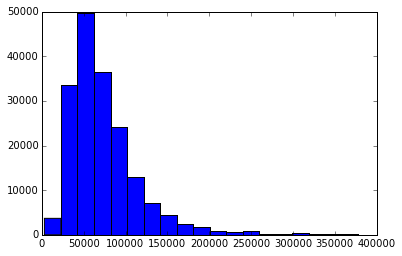

In [36]:
#%matplotlib inline
incomes = df['annual_inc'].dropna()
small_incs = [x for x in incomes if x < 400000]
print len(small_incs)
plt.hist(small_incs, bins=20)

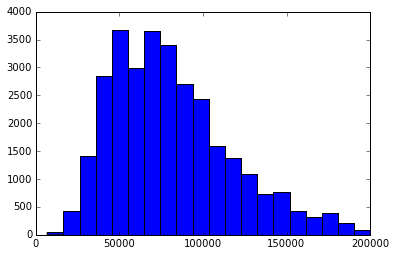

In [37]:
df_A_only = df[df['grade'] == 'A']
A_incomes = df_A_only['annual_inc'].dropna()
A_small_incs = [x for x in A_incomes if x < 200000]
plt.hist(A_small_incs, bins=20, histtype='bar')
plt.legend()

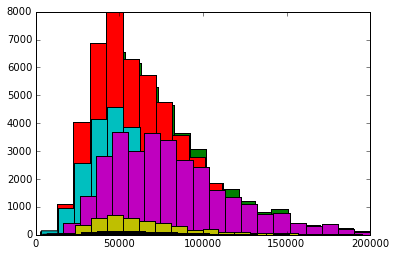

In [35]:
df_A_only = df[df['grade'] == 'A']
A_incomes = df_A_only['annual_inc'].dropna()
A_small_incs = [x for x in A_incomes if x < 200000]
plt.hist(A_small_incs, bins=20, histtype='bar')
plt.legend()

df_B_only = df[df['grade'] == 'B']
B_incomes = df_B_only['annual_inc'].dropna()
B_small_incs = [x for x in B_incomes if x < 200000]
plt.hist(B_small_incs, bins=20, histtype='bar')
plt.legend()

df_C_only = df[df['grade'] == 'C']
C_incomes = df_C_only['annual_inc'].dropna()
C_small_incs = [x for x in C_incomes if x < 200000]
plt.hist(C_small_incs, bins=20, histtype='bar')
plt.legend()

df_D_only = df[df['grade'] == 'D']
D_incomes = df_D_only['annual_inc'].dropna()
D_small_incs = [x for x in D_incomes if x < 200000]
plt.hist(D_small_incs, bins=20, histtype='bar')
plt.legend()

df_E_only = df[df['grade'] == 'E']
E_incomes = df_A_only['annual_inc'].dropna()
E_small_incs = [x for x in E_incomes if x < 200000]
plt.hist(E_small_incs, bins=20, histtype='bar')
plt.legend()

df_F_only = df[df['grade'] == 'F']
F_incomes = df_F_only['annual_inc'].dropna()
F_small_incs = [x for x in F_incomes if x < 200000]
plt.hist(F_small_incs, bins=20, histtype='bar')
plt.legend()

df_G_only = df[df['grade'] == 'G']
G_incomes = df_G_only['annual_inc'].dropna()
G_small_incs = [x for x in G_incomes if x < 200000]
plt.hist(G_small_incs, bins=20, histtype='bar')
plt.legend()

plt.show()

In [22]:
#%matplotlib inline
#df_by_grade = []
#k = 1

print sorted(df['grade'].unique())
#for i in (df['grade'].unique()):
    #print i
#    df_by_grade = df[df['grade'] == i] 
    #print k
#    k += 1

#print len(df_by_grade)
'''
df_A_only = df[df['grade'] == 'A']
A_incomes = df_A_only['annual_inc'].dropna()
A_small_incs = [x for x in A_incomes if x < 200000]
plt.hist(small_incs, bins=20)
'''

#df_by_grade

[nan, 'A', 'B', 'C', 'D', 'E', 'F', 'G']


"\ndf_A_only = df[df['grade'] == 'A']\nA_incomes = df_A_only['annual_inc'].dropna()\nA_small_incs = [x for x in A_incomes if x < 200000]\nplt.hist(small_incs, bins=20)\n"

In [53]:
interestRates = df['int_rate'].dropna()
interestRates = interestRates.map(lambda x: float(x.strip('%')))

(array([  1314.,      0.,   2725.,   1178.,   3849.,   2471.,   5218.,
          1212.,   1597.,   1737.,   8106.,      0.,   8714.,      0.,
          2020.,      0.,   6541.,   2109.,      0.,   7581.,      0.,
          2271.,      0.,   8110.,      0.,   2560.,   7300.,      0.,
          2485.,  11100.,      0.,   8225.,   2694.,   7928.,      0.,
          2543.,   7990.,   2463.,      0.,   6267.,   2004.,      0.,
             0.,   7475.,      0.,   1594.,      0.,   5580.,      0.,
          5339.,      0.,   3814.,   4617.,      0.,   3238.,   1850.,
             0.,   1959.,   1677.,   1709.,      0.,   1389.,      0.,
             0.,   1383.,      0.,   1061.,      0.,      0.,   1057.,
           881.,      0.,      0.,      0.,   1356.,      0.,      0.,
             0.,    986.,      0.,      0.,    582.,      0.,    654.,
             0.,    416.,    804.,    181.,      0.,      0.,     64.,
             0.,     50.,      0.,      0.,     38.,      0.,     21.,
      

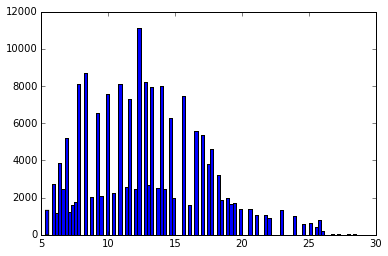

In [60]:
plt.hist(interestRates, bins=100)

In [3]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf
#iris = load_iris()
#cross_val_score(clf, iris.data, iris.target, cv=10)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')